In [1]:
import torch
import numpy as np
torch.manual_seed(42)

x = torch.randn(100, 1)
x[:5]

tensor([[ 1.9269],
        [ 1.4873],
        [ 0.9007],
        [-2.1055],
        [ 0.6784]])

In [2]:
# Generate some fake data
y = 3*x+2
y[:5]

tensor([[ 7.7807],
        [ 6.4619],
        [ 4.7022],
        [-4.3166],
        [ 4.0353]])

Here I have just created some fake data that I am going to try and learn.

In [3]:
"""
  Initialize a weight and bias, as we only have one function that is trying to
  learn the linear data.
"""
# w = torch.randn(1, requires_grad=True)
# b = torch.randn(1, requires_grad=True)

'\n  Initialize a weight and bias, as we only have one function that is trying to\n  learn the linear data.\n'

In [4]:
# now i want to run my training loop to find the most optimal learning rate
lrs = [0.001, 0.01, 0.05, 0.1]
lr_dict = {}
for lr in lrs:
  lr_dict[lr] = {"losses": [],
                 "weights": [],
                 "biases": []
                 }
  print(f"Iteration for learning rate {lr}:")

  w = torch.randn(1, requires_grad=True)
  b = torch.randn(1, requires_grad=True)
  for i in range(501):
    y_pred = w * x + b
    loss = ((y-y_pred)**2).mean()

    loss.backward()

    with torch.no_grad():
      w -= lr * w.grad
      b -= lr * b.grad
      w.grad.zero_()
      b.grad.zero_()

    if i % 50 == 0:
      lr_dict[lr]['losses'].append(loss.item())
      lr_dict[lr]['weights'].append(w.item())
      lr_dict[lr]['biases'].append(b.item())
      print(i, loss.item(), w.item(), b.item())
  print("-------------------------------------")

Iteration for learning rate 0.001:
0 20.006261825561523 -0.5599759817123413 -0.5650797486305237
50 16.259136199951172 -0.21775484085083008 -0.3014686107635498
100 13.214421272277832 0.09147611260414124 -0.06482026726007462
150 10.740352630615234 0.3709055185317993 0.14761210978031158
200 8.72989559173584 0.6234130859375 0.33829647302627563
250 7.096103668212891 0.8515996336936951 0.509450376033783
300 5.768354415893555 1.0578137636184692 0.6630656123161316
350 4.68927001953125 1.2441773414611816 0.8009316325187683
400 3.8122398853302 1.4126067161560059 0.9246563911437988
450 3.0993998050689697 1.5648316144943237 1.0356841087341309
500 2.519981861114502 1.7024165391921997 1.1353113651275635
-------------------------------------
Iteration for learning rate 0.01:
0 5.783140659332275 1.6274032592773438 0.15093226730823517
50 0.6990569233894348 2.523756980895996 1.3563988208770752
100 0.0845017358660698 2.834806203842163 1.7759488821029663
150 0.010214636102318764 2.9427177906036377 1.92198

In [5]:
lowest_per_lr = [(lr, np.argmin(metrics['losses']), np.min(metrics['losses'])) for lr, metrics in lr_dict.items()]
lowest_per_lr

[(0.001, np.int64(10), np.float64(2.519981861114502)),
 (0.01, np.int64(10), np.float64(3.893570355018028e-09)),
 (0.05, np.int64(3), np.float64(2.767848233595216e-12)),
 (0.1, np.int64(2), np.float64(4.4153125166451757e-13))]

So we can see that with a lr of 0.1, we reach the most optimal solution quickest... in fact, we can do it within 100 iterations.

In [6]:
data = lowest_per_lr[3]
# data is a tuple of (index, lowest loss)
weight = lr_dict[data[0]]['weights'][data[1]]
bias = lr_dict[data[0]]['biases'][data[1]]
weight, bias

(2.999999523162842, 2.000000476837158)

As we can see, we almost perfectly learned the weight and bias where our true weight = 3 and our truw bias was = 2. We only missed by a fractional amount due to floating point precision.

In [7]:
losses = lr_dict[data[0]]['losses']
iteration = np.arange(0, 501, 50)

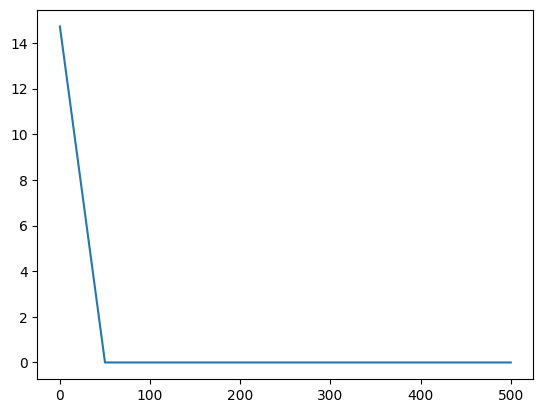

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(iteration, losses)

plt.show()

In [10]:
# Task 1a
x = torch.tensor([[2.0]])
y = torch.tensor([[8.0]])
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

y_pred = w * x + b
loss = ((y-y_pred)**2).mean()
loss.backward()
print(w.grad, b.grad)

# Task 2a
lr = 0.05
with torch.no_grad():
  # w = w - lr * w.grad
  # b = b - lr * b.grad

  # The above does NOT work
  # It creates a new tensor that does not have requires_grad()
  w -= lr * w.grad
  b -= lr * b.grad

w.grad.zero_()
b.grad.zero_()
print(w.item(), b.item())

tensor([-35.9298]) tensor([-17.9649])
1.5577635765075684 0.39325350522994995


In [27]:
# Task 3a
x_ = torch.tensor([[2.0]])
y_ = torch.tensor([[8.0]])
lrs = [0.001, 0.1, 10]
results = {}

for lr in lrs:
  print(f"Learing Rate: {lr}")
  w_ = torch.randn(1, requires_grad=True)
  b_ = torch.randn(1, requires_grad=True)
  results[lr] = []

  for i in range(51):
    y_pred_ = w_ * x_ + b_
    loss = ((y_-y_pred_)**2).mean()
    loss.backward()

    with torch.no_grad():
      w_ -= lr * w_.grad
      b_ -= lr * b_.grad
      results[lr].append(loss.item())
      if i % 10 == 0:
        print(f"Loss: {loss.item()}")

    w_.grad.zero_()
    b_.grad.zero_()
  print("-----------------------------")


Learing Rate: 0.001
Loss: 132.48004150390625
Loss: 108.3563461303711
Loss: 88.62539672851562
Loss: 72.48731994628906
Loss: 59.28789138793945
Loss: 48.491973876953125
-----------------------------
Learing Rate: 0.1
Loss: 140.81065368652344
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
-----------------------------
Learing Rate: 10
Loss: 94.54022216796875
Loss: inf
Loss: inf
Loss: nan
Loss: nan
Loss: nan
-----------------------------


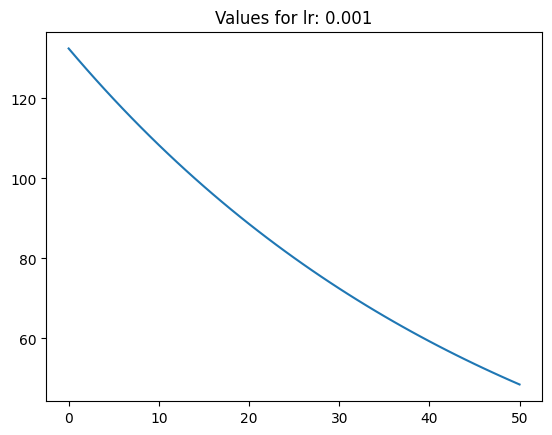

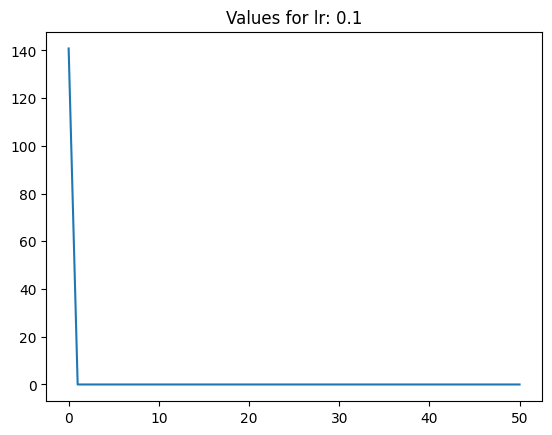

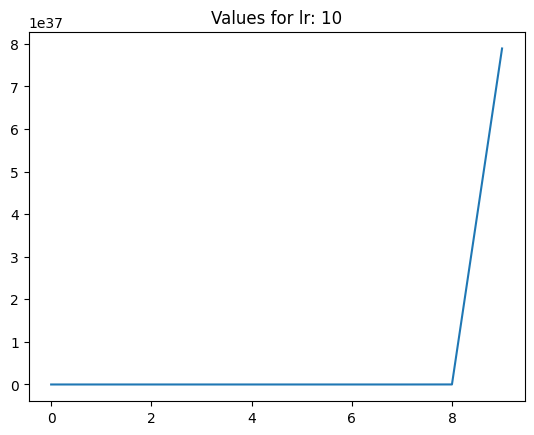

In [28]:
for lr, values in results.items():
  plt.plot(values)
  plt.title(f"Values for lr: {lr}")
  plt.show()

In [50]:
import torch.nn as nn

# Getting values from -2pi to 2pi
sin_x = torch.linspace(-2*torch.pi, 2*torch.pi, 200).unsqueeze(1)
sin_y = torch.sin(sin_x)

# Now we need a non-linear model
lrs = [0.0001, 0.01, 0.1, 10]
critereon = nn.MSELoss()
results = {}
for lr in lrs:
  print(f"Running lr: {lr}")
  model = nn.Sequential(
      nn.Linear(1, 10),
      nn.Tanh(),
      nn.Linear(10, 1)
  )
  results[lr] = []
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)

  for i in range(501):
    sin_pred = model(sin_x)
    loss = critereon(sin_y, sin_pred)
    loss.backward()

    optimizer.step()
    results[lr].append(loss.item())

    if i % 100 == 0:
      print(f"Epoch {i}, Loss: {loss.item():.4f}")

    optimizer.zero_grad()

Running lr: 0.0001
Epoch 0, Loss: 0.6649
Epoch 100, Loss: 0.5447
Epoch 200, Loss: 0.5098
Epoch 300, Loss: 0.4945
Epoch 400, Loss: 0.4834
Epoch 500, Loss: 0.4737
Running lr: 0.01
Epoch 0, Loss: 0.9539
Epoch 100, Loss: 0.0962
Epoch 200, Loss: 0.0795
Epoch 300, Loss: 0.0729
Epoch 400, Loss: 0.0678
Epoch 500, Loss: 0.0639
Running lr: 0.1
Epoch 0, Loss: 0.6238
Epoch 100, Loss: 0.0556
Epoch 200, Loss: 0.0343
Epoch 300, Loss: 0.0174
Epoch 400, Loss: 0.0226
Epoch 500, Loss: 0.0210
Running lr: 10
Epoch 0, Loss: 1.1459
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan


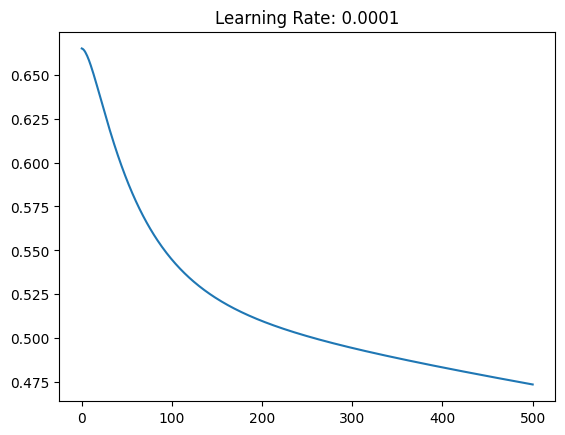

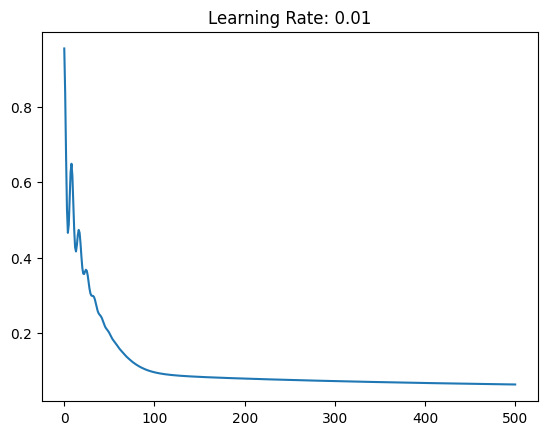

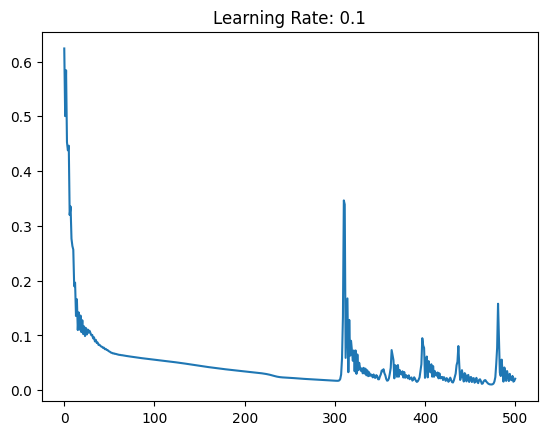

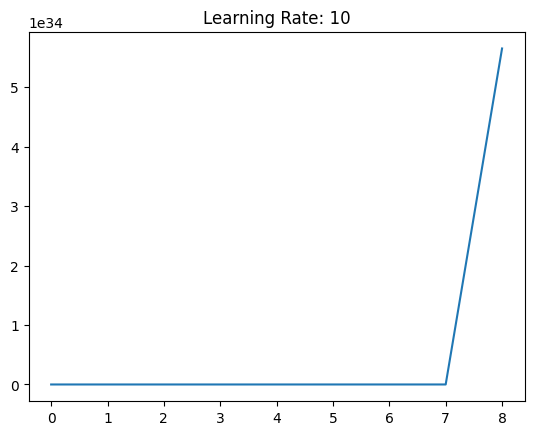

In [51]:
for lr, values in results.items():
  plt.plot(values)
  plt.title(f"Learning Rate: {lr}")
  plt.show()